# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [57]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
# Import API key
from api_keys import weather_api_key
import scipy.stats as st

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

592

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [14]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
query_url = f"{url}units={units}&APPID={weather_api_key}&q="
temp=[]
humid=[]
cloud=[]
wind_speed=[]
city_id=0
#city_final=[]
country=[]
lat=[]
long=[]
datetime=[]

#weather part of the API can't get city_final to append
for city in cities:
    print(f"Processing record {city_id} for {city}") 
    try:
        response=requests.get(query_url + city).json()
        temp.append(response['main']['temp_max'])
        humid.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind_speed.append(response ['wind']['speed'])
        country.append(response['sys']['country'])
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        datetime.append(response['dt'])
        #city_final.apppend(response['name'])
        city_id=city_id+1
        print("City found appending stats")
    except: 
        print("City does not exist in weather API")
    pass


Processing record 0 for zlatoustovsk
City does not exist in weather API
Processing record 0 for maine-soroa
City found appending stats
Processing record 1 for ushuaia
City found appending stats
Processing record 2 for yuanping
City found appending stats
Processing record 3 for saint-philippe
City found appending stats
Processing record 4 for akyab
City found appending stats
Processing record 5 for georgetown
City found appending stats
Processing record 6 for busselton
City found appending stats
Processing record 7 for borogontsy
City found appending stats
Processing record 8 for smithers
City found appending stats
Processing record 9 for banihal
City found appending stats
Processing record 10 for taolanaro
City does not exist in weather API
Processing record 10 for moquegua
City found appending stats
Processing record 11 for rikitea
City found appending stats
Processing record 12 for sorland
City found appending stats
Processing record 13 for mount vernon
City found appending stats
Pro

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [78]:
cities_data=pd.DataFrame({
          "Country": country,
          "Latitude": lat,
          "Longitude": long,
          "Date Time": datetime,
          "Temperature": temp,
          "Humidity (%)": humid,
           "Cloudiness": cloud,
           "Wind Speed": wind_speed
          })
cities_data.head()
cities_data.to_csv(output_data_file)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [80]:
#  Get the indices of cities that have humidity over 100%.
#double check this
overhumid=[]
for x in cities_data["Humidity (%)"]:
    if x > 100:
        overhumid.append(x)
overhumid

[]

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [ ]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0.5, 1.0, 'Temperature vs Latitude')

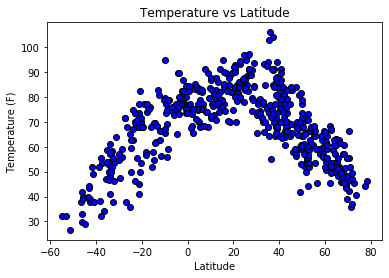

In [88]:
x_axis=cities_data["Latitude"]
y_axis=cities_data["Temperature"]
plt.scatter(x_axis, y_axis, facecolors="blue", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("Temperature vs Latitude")

## Latitude vs. Humidity Plot

Text(0.5, 1.0, 'Humidity vs Latitude')

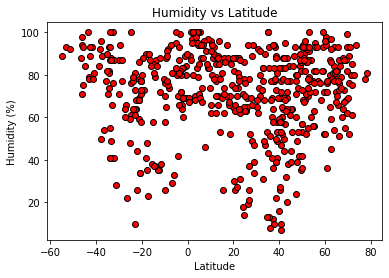

In [91]:
x_axis=cities_data["Latitude"]
y_axis=cities_data["Humidity (%)"]
plt.scatter(x_axis, y_axis, facecolors="red", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Humidity vs Latitude")

## Latitude vs. Cloudiness Plot

Text(0.5, 1.0, 'Cloudiness vs Latitude')

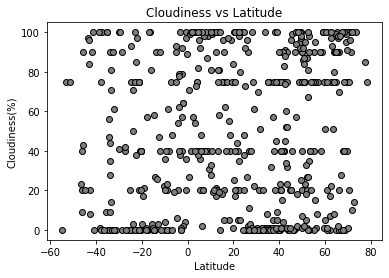

In [92]:
x_axis=cities_data["Latitude"]
y_axis=cities_data["Cloudiness"]
plt.scatter(x_axis, y_axis, facecolors="gray", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title("Cloudiness vs Latitude")

## Latitude vs. Wind Speed Plot

Text(0.5, 1.0, 'Wind Speed vs Latitude')

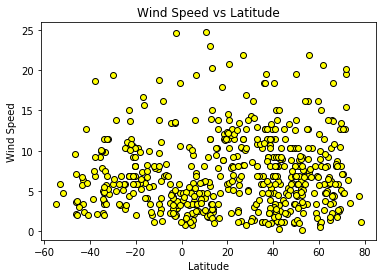

In [93]:
x_axis=cities_data["Latitude"]
y_axis=cities_data["Wind Speed"]
plt.scatter(x_axis, y_axis, facecolors="yellow", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Wind Speed vs Latitude")

## Linear Regression

In [85]:
# OPTIONAL: Create a function to create Linear Regression plots
# Create Northern and Southern Hemisphere DataFrames
northern_cities=cities_data[(cities_data["Latitude"]>0)]
southern_cities=cities_data[(cities_data["Latitude"]<0)]

def regression(df, x_values, y_values, region):

    x=df[x_values]
    y=df[y_values]
    correlation=st.pearsonr(x, y)
    print(correlation)
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    plt.xlabel(x_values)
    plt.ylabel(y_values)
    plt.title(f"{region} {x_values} vs {y_values}")
    plt.scatter(x, y)
    plt.plot(x, regress_values, "r-")



####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

(-0.7008509154437579, 1.3381210107493998e-58)


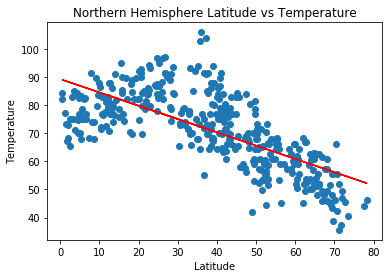

In [76]:
regression(northern_cities, "Latitude", "Temperature", "Northern Hemisphere")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

(0.8347371320976451, 1.5771587079010054e-42)


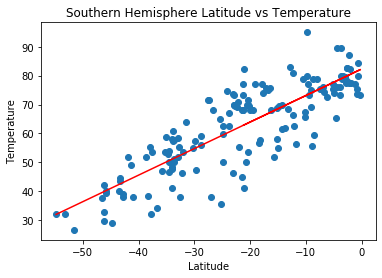

In [75]:
regression(southern_cities, "Latitude", "Temperature", "Southern Hemisphere")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

(-0.045759754842198505, 0.368692389925183)


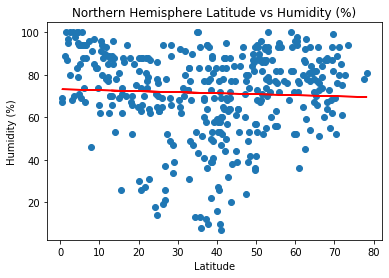

In [86]:
regression(northern_cities, "Latitude", "Humidity (%)", "Northern Hemisphere")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

(-0.1436598970491102, 0.07082901767966407)


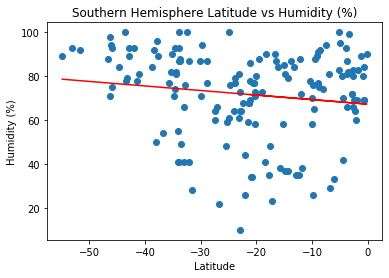

In [87]:
regression(southern_cities, "Latitude", "Humidity (%)", "Southern Hemisphere")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression